<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
level = 2 + 0.05 * np.random.randn(120, )

In [ ]:
trend = np.linspace(0, 10, 120) + 0.1 * np.random.randn(120)

In [ ]:
seasonality = np.sin(np.linspace(0, 119, 120) * (2 *np.pi / 12)) + 0.1 * np.random.randn(120,)

In [ ]:
composite = level + trend + seasonality

In [ ]:
T = 10
D = 1
X = []
Y = []

for t in range(len(composite) - T):
    x = composite[t: t + T]
    X.append(x)

    y = composite[t + T]
    Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T x D
Y = np.array(Y)

print(f'Shape of X: {X.shape} \nShape of Y: {Y.shape}')

Shape of X: (110, 10, 1) 
Shape of Y: (110,)


In [ ]:
split = int(X.shape[0] * 0.8)

In [ ]:
X_train = X[: split, :, :]
y_train = Y[: split]

X_test = X[split : , :, :]
y_test = Y[split: ]

In [ ]:
i = Input(shape = (T, D))
x = SimpleRNN(5, activation = 'tanh')(i)
x = Dense(D)(x)

model = Model(i, x)

In [ ]:
model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.01))

In [ ]:
result = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 58.0075 - val_loss: 137.9360
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 52.9947 - val_loss: 133.3579
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 51.5827 - val_loss: 129.1004
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 48.0034 - val_loss: 125.0108
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 48.8430 - val_loss: 121.0106
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 45.6914 - val_loss: 117.0440
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 40.1285 - val_loss: 113.0051
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 38.0432 - val_loss: 108.6988
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 36.0258 - val_loss: 103.8702
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 35.2673 - val_loss: 96.9160
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 29.2891 - val_loss: 88.7405
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - l

In [ ]:
predictions = []
i = 0

while len(predictions) < len(X_test):
    predict = model.predict(X_test[i].reshape(1, -1, 1))[0, 0]
    i+= 1

    predictions.append(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


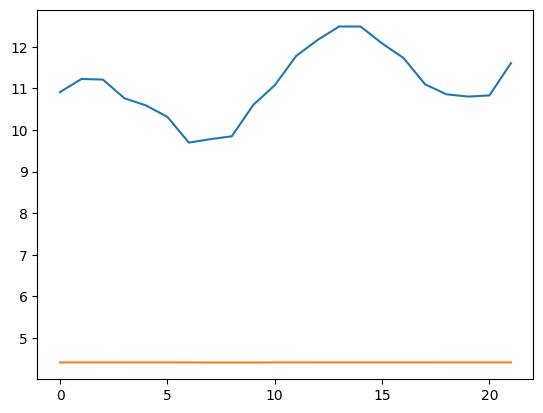

In [ ]:
plt.plot(y_test)
plt.plot(predictions)
plt.show();

In [ ]:
predictions = []
input_X = X_train[-1]

while len(predictions) < X_test.shape[0]:
    predict = model.predict(input_X.reshape(1, -1, 1))[0, 0]

    predictions.append(predict)

    input_X = np.roll(input_X, -1)
    input_X[-1] = predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


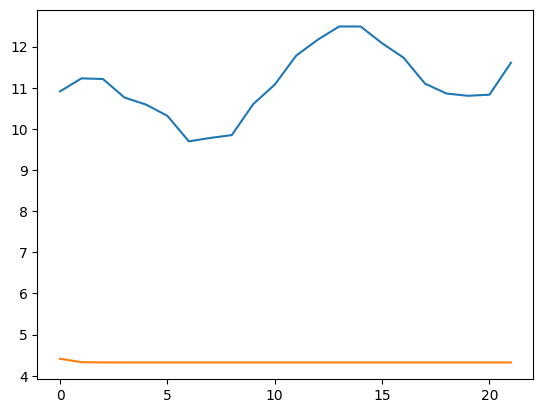

In [ ]:
plt.plot(y_test)
plt.plot(predictions)
plt.show();